# COVID-19 پیپرز کا تجزیہ

اس چیلنج میں، ہم COVID وبا کے موضوع پر بات جاری رکھیں گے اور اس موضوع پر سائنسی مقالوں کو پروسیس کرنے پر توجہ دیں گے۔ [CORD-19 Dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) میں 7000 سے زیادہ (لکھنے کے وقت) COVID پر مقالے موجود ہیں، جو میٹا ڈیٹا اور خلاصے کے ساتھ دستیاب ہیں (اور ان میں سے تقریباً نصف کے لیے مکمل متن بھی فراہم کیا گیا ہے)۔

اس ڈیٹا سیٹ کا تجزیہ کرنے کی مکمل مثال [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) کوگنیٹو سروس کا استعمال کرتے ہوئے [اس بلاگ پوسٹ](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) میں بیان کی گئی ہے۔ ہم اس تجزیے کا ایک آسان ورژن پر بات کریں گے۔


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ڈیٹا حاصل کرنا

سب سے پہلے، ہمیں CORD پیپرز کے میٹا ڈیٹا کو حاصل کرنا ہوگا جن پر ہم کام کریں گے۔

**نوٹ**: ہم اس ریپوزٹری کے حصے کے طور پر ڈیٹا سیٹ کی کاپی فراہم نہیں کرتے۔ آپ کو پہلے [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) فائل کو [Kaggle پر موجود اس ڈیٹا سیٹ](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) سے ڈاؤنلوڈ کرنا ہوگا۔ ممکن ہے کہ Kaggle پر رجسٹریشن کی ضرورت ہو۔ آپ بغیر رجسٹریشن کے [یہاں سے](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html) بھی ڈیٹا سیٹ ڈاؤنلوڈ کر سکتے ہیں، لیکن اس میں میٹا ڈیٹا فائل کے علاوہ تمام مکمل متن بھی شامل ہوں گے۔

ہم ڈیٹا کو براہ راست آن لائن سورس سے حاصل کرنے کی کوشش کریں گے، لیکن اگر یہ ناکام ہو جائے، تو آپ کو اوپر بیان کردہ طریقے سے ڈیٹا ڈاؤنلوڈ کرنا ہوگا۔ مزید یہ کہ، اگر آپ اس پر مزید تجربات کرنے کا ارادہ رکھتے ہیں تو ڈیٹا ڈاؤنلوڈ کرنا سمجھداری ہوگی تاکہ انتظار کے وقت کو بچایا جا سکے۔

> **نوٹ** کہ ڈیٹا سیٹ کافی بڑا ہے، تقریباً 1 جی بی سائز کا، اور درج ذیل کوڈ کی لائن مکمل ہونے میں کافی وقت لے سکتی ہے! (~5 منٹ)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

ہم اب اشاعت کی تاریخ کے کالم کو `datetime` میں تبدیل کریں گے، اور اشاعت کی تاریخوں کی حد دیکھنے کے لیے ہسٹوگرام بنائیں گے۔


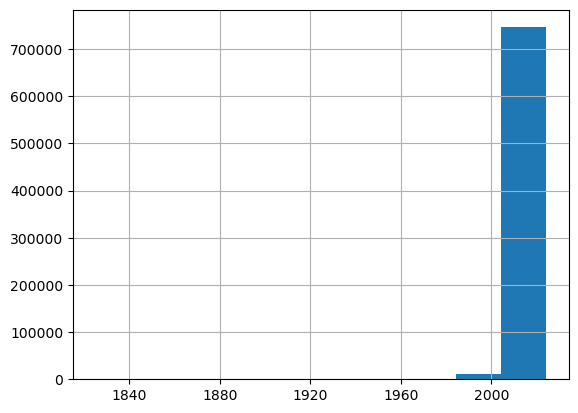

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## منظم ڈیٹا کا استخراج

آئیے دیکھتے ہیں کہ ہم خلاصوں سے کس قسم کی معلومات آسانی سے نکال سکتے ہیں۔ ایک چیز جس میں ہمیں دلچسپی ہو سکتی ہے وہ یہ ہے کہ کون سی علاجی حکمت عملیاں موجود ہیں، اور وہ وقت کے ساتھ کیسے تبدیل ہوئیں۔ شروع کرنے کے لیے، ہم COVID کے علاج کے لیے استعمال ہونے والی ممکنہ ادویات کی فہرست اور تشخیصات کی فہرست دستی طور پر مرتب کر سکتے ہیں۔ اس کے بعد ہم ان پر نظر ڈالیں گے اور مقالوں کے خلاصوں میں ان سے متعلقہ اصطلاحات تلاش کریں گے۔


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


ہم نے اپنے ڈیٹا فریم میں کئی کالمز شامل کیے ہیں جو یہ ظاہر کرتے ہیں کہ کسی دی گئی دوا یا تشخیص کتنی بار خلاصے میں موجود ہے۔

> **نوٹ کریں** کہ ہم لفظ کے شروع میں جگہ شامل کرتے ہیں جب ہم کسی ذیلی سلسلے کی تلاش کرتے ہیں۔ اگر ہم ایسا نہ کریں تو ہمیں غلط نتائج مل سکتے ہیں، کیونکہ *chloroquine* کو *hydroxychloroquine* کے اندر بھی پایا جا سکتا ہے۔ اس کے علاوہ، ہم خلاصے کے کالم کو `str` میں تبدیل کرنے پر مجبور کرتے ہیں تاکہ ایک غلطی سے بچا جا سکے - `str` کو ہٹانے کی کوشش کریں اور دیکھیں کیا ہوتا ہے۔

ڈیٹا کے ساتھ کام کو آسان بنانے کے لیے، ہم صرف دوا کے شمار کے ساتھ ایک ذیلی فریم نکال سکتے ہیں اور وقوعات کی مجموعی تعداد کا حساب لگا سکتے ہیں۔ اس سے ہمیں سب سے زیادہ مقبول دوا کا پتہ چلتا ہے:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

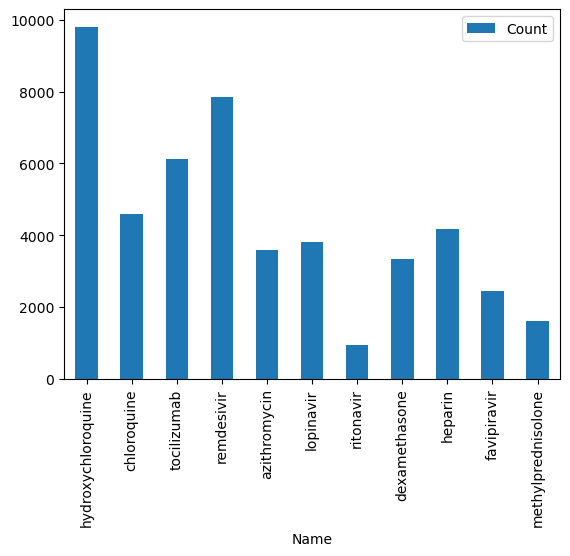

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## علاج کی حکمت عملی میں رجحانات تلاش کرنا

اوپر دیے گئے مثال میں ہم نے تمام قدروں کو `sum` کیا ہے، لیکن ہم یہ ماہانہ بنیاد پر بھی کر سکتے ہیں:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

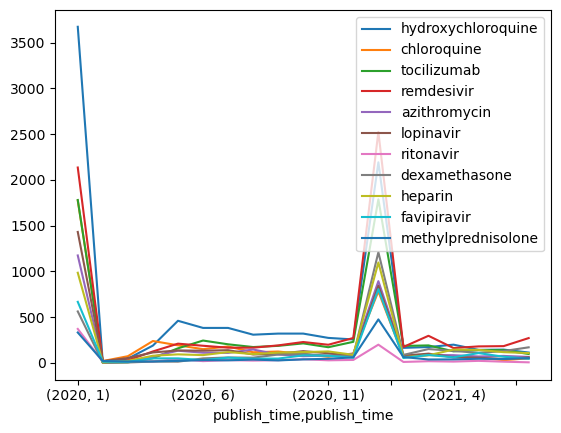

In [152]:
dfmt.plot()
plt.show()

ایک دلچسپ مشاہدہ یہ ہے کہ ہمارے پاس دو مقامات پر بہت زیادہ اضافہ ہے: جنوری 2020 اور جنوری 2021۔ اس کی وجہ یہ ہے کہ کچھ مقالوں میں اشاعت کی تاریخ واضح طور پر درج نہیں ہوتی، اور انہیں متعلقہ سال کے جنوری کے طور پر درج کیا جاتا ہے۔

ڈیٹا کو بہتر طور پر سمجھنے کے لیے، آئیے صرف چند دوائیوں کو دیکھتے ہیں۔ ہم جنوری کے ڈیٹا کو "مٹائیں گے" اور اسے کسی درمیانی قدر سے بھر دیں گے، تاکہ گراف کو زیادہ خوبصورت بنایا جا سکے:


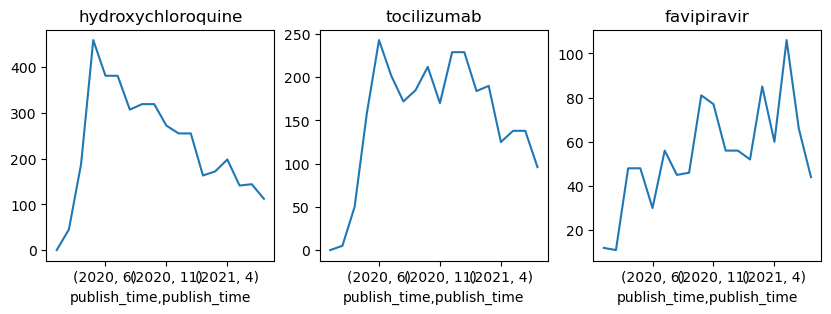

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

مشاہدہ کریں کہ ہائیڈروکسی کلوروکوئن کی مقبولیت ابتدائی چند مہینوں میں بڑھ رہی تھی، اور پھر کم ہونا شروع ہو گئی، جبکہ فیویپیراویر کے ذکر کی تعداد مستحکم اضافہ دکھاتی ہے۔ نسبتی مقبولیت کو دیکھنے کا ایک اور اچھا طریقہ **اسٹیک پلاٹ** (یا پانڈاز کی اصطلاح میں **ایریا پلاٹ**) استعمال کرنا ہے۔


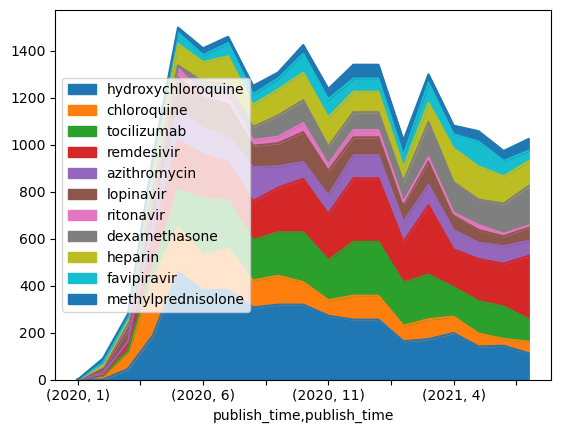

In [154]:
dfmt.plot.area()
plt.show()

ہم مزید آگے بڑھ کر نسبتی مقبولیت کو فیصد میں حساب کر سکتے ہیں:


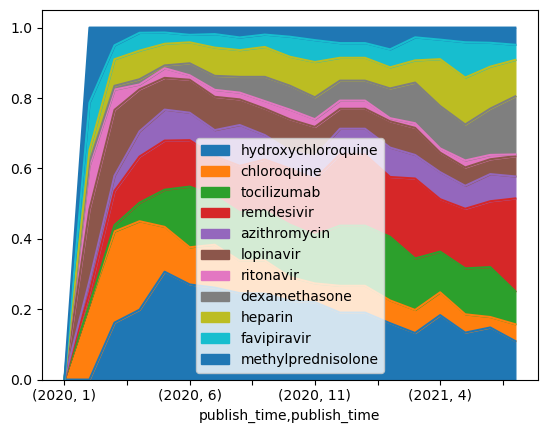

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## طب اور تشخیص کے درمیان تعلق

ایک دلچسپ تعلق جسے ہم دیکھ سکتے ہیں وہ یہ ہے کہ مختلف تشخیصات کو مختلف ادویات کے ساتھ کیسے علاج کیا جاتا ہے۔ اس کو دیکھنے کے لیے ہمیں **ہم وقوع فریکوئنسی نقشہ** تیار کرنا ہوگا، جو یہ دکھائے گا کہ دو اصطلاحات کو ایک ہی مقالے میں کتنی بار ذکر کیا گیا ہے۔

ایسا نقشہ بنیادی طور پر ایک 2D میٹرکس ہوتا ہے، جسے **numpy array** کے ذریعے بہترین طور پر ظاہر کیا جا سکتا ہے۔ ہم یہ نقشہ تمام خلاصوں کا جائزہ لے کر اور وہاں موجود عناصر کو نشان زد کر کے تیار کریں گے:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

اس میٹرکس کو تصور کرنے کے طریقوں میں سے ایک **ہیٹ میپ** بنانا ہے:


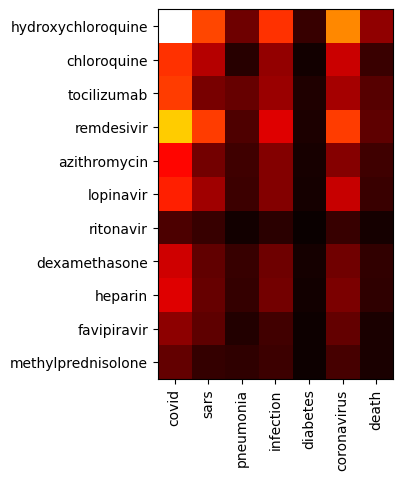

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

تاہم، بہتر تصور کے لیے **Sankey** ڈایاگرام کا استعمال کیا جا سکتا ہے! `matplotlib` میں اس قسم کے ڈایاگرام کے لیے بلٹ ان سپورٹ موجود نہیں ہے، اس لیے ہمیں [Plotly](https://plotly.com/python/) کا استعمال کرنا ہوگا جیسا کہ [اس ٹیوٹوریل](https://plotly.com/python/sankey-diagram/) میں بیان کیا گیا ہے۔

Plotly Sankey ڈایاگرام بنانے کے لیے، ہمیں درج ذیل فہرستیں تیار کرنی ہوں گی:
* گراف کے تمام نوڈز کی فہرست `all_nodes`، جس میں دونوں دوائیاں اور تشخیص شامل ہوں گی
* سورس اور ٹارگٹ انڈیکس کی فہرست - یہ فہرستیں دکھائیں گی کہ کون سے نوڈز ڈایاگرام کے بائیں طرف جائیں گے اور کون سے دائیں طرف
* تمام لنکس کی فہرست، ہر لنک میں شامل ہوگا:
   - `all_nodes` ارے میں سورس انڈیکس
   - ٹارگٹ انڈیکس
   - لنک کی طاقت کو ظاہر کرنے والی ویلیو۔ یہ بالکل وہی ویلیو ہے جو ہماری co-occurence میٹرکس سے لی گئی ہے۔
   - اختیاری طور پر لنک کا رنگ۔ وضاحت کے لیے ہم کچھ اصطلاحات کو نمایاں کرنے کا آپشن دیں گے

Sankey ڈایاگرام بنانے کے لیے عمومی کوڈ ایک علیحدہ `sankey` فنکشن کے طور پر ترتیب دیا گیا ہے، جو دو فہرستیں (سورس اور ٹارگٹ کیٹیگریز) اور co-occurence میٹرکس لیتا ہے۔ یہ ہمیں تھریش ہولڈ بھی مخصوص کرنے کی اجازت دیتا ہے، اور ان تمام لنکس کو چھوڑ دیتا ہے جو اس تھریش ہولڈ سے کمزور ہیں - اس سے ڈایاگرام تھوڑا کم پیچیدہ ہو جاتا ہے۔


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## نتیجہ

آپ نے دیکھا کہ ہم غیر منظم ڈیٹا ذرائع، جیسے کہ متن، سے معلومات نکالنے کے لیے کافی آسان طریقے استعمال کر سکتے ہیں۔ اس مثال میں، ہم نے موجودہ ادویات کی فہرست لی ہے، لیکن قدرتی زبان کی پروسیسنگ (NLP) تکنیکوں کا استعمال کرتے ہوئے متن سے اداروں کو نکالنا کہیں زیادہ مؤثر ہوگا۔ [اس بلاگ پوسٹ](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) میں ہم وضاحت کرتے ہیں کہ اداروں کو نکالنے کے لیے کلاؤڈ سروسز کا استعمال کیسے کیا جا سکتا ہے۔ ایک اور آپشن Python NLP لائبریریوں جیسے [NLTK](https://www.nltk.org/) کا استعمال ہوگا - NLTK کے ذریعے متن سے معلومات نکالنے کا طریقہ [یہاں](https://www.nltk.org/book/ch07.html) بیان کیا گیا ہے۔


## چیلنج

COVID پیپر ڈیٹا پر تحقیق کو درج ذیل خطوط پر جاری رکھیں:

1. مختلف ادویات کے لیے co-occurrence matrix بنائیں، اور دیکھیں کہ کون سی ادویات اکثر ایک ساتھ ظاہر ہوتی ہیں (یعنی ایک abstract میں ذکر کی گئی ہیں)۔ آپ ادویات اور تشخیص کے لیے co-occurrence matrix بنانے کے کوڈ میں ترمیم کر سکتے ہیں۔
1. اس matrix کو heatmap کے ذریعے visualize کریں۔
1. ایک اضافی ہدف کے طور پر، آپ ادویات کے co-occurrence کو [chord diagram](https://en.wikipedia.org/wiki/Chord_diagram) کے ذریعے visualize کرنے کی کوشش کر سکتے ہیں۔ [یہ لائبریری](https://pypi.org/project/chord/) آپ کو chord diagram بنانے میں مدد دے سکتی ہے۔
1. ایک اور اضافی ہدف کے طور پر، مختلف ادویات کی مقداریں (جیسے **400mg** جیسا کہ *روزانہ chloroquine کے 400mg لیں*) کو regular expressions کے ذریعے extract کرنے کی کوشش کریں، اور ایک dataframe بنائیں جو مختلف ادویات کے لیے مختلف مقداریں دکھائے۔ **نوٹ**: ان عددی قدروں پر غور کریں جو دوا کے نام کے قریب متن میں موجود ہوں۔



---

**ڈسکلیمر**:  
یہ دستاویز AI ترجمہ سروس [Co-op Translator](https://github.com/Azure/co-op-translator) کا استعمال کرتے ہوئے ترجمہ کی گئی ہے۔ ہم درستگی کے لیے کوشش کرتے ہیں، لیکن براہ کرم آگاہ رہیں کہ خودکار ترجمے میں غلطیاں یا غیر درستیاں ہو سکتی ہیں۔ اصل دستاویز کو اس کی اصل زبان میں مستند ذریعہ سمجھا جانا چاہیے۔ اہم معلومات کے لیے، پیشہ ور انسانی ترجمہ کی سفارش کی جاتی ہے۔ ہم اس ترجمے کے استعمال سے پیدا ہونے والی کسی بھی غلط فہمی یا غلط تشریح کے ذمہ دار نہیں ہیں۔
